In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde




In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
## Data Preprocessing

missing_values = data.isnull().sum()

# Output the missing values
print(missing_values)
## BMI contains missing values

## Use simple imputer

from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')  # or use strategy='median'

data['bmi'] = imputer.fit_transform(data[['bmi']])

# Check the results
print(data['bmi'].isnull().sum())  # Should be 0 if all missing values are filled




id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
0


In [6]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


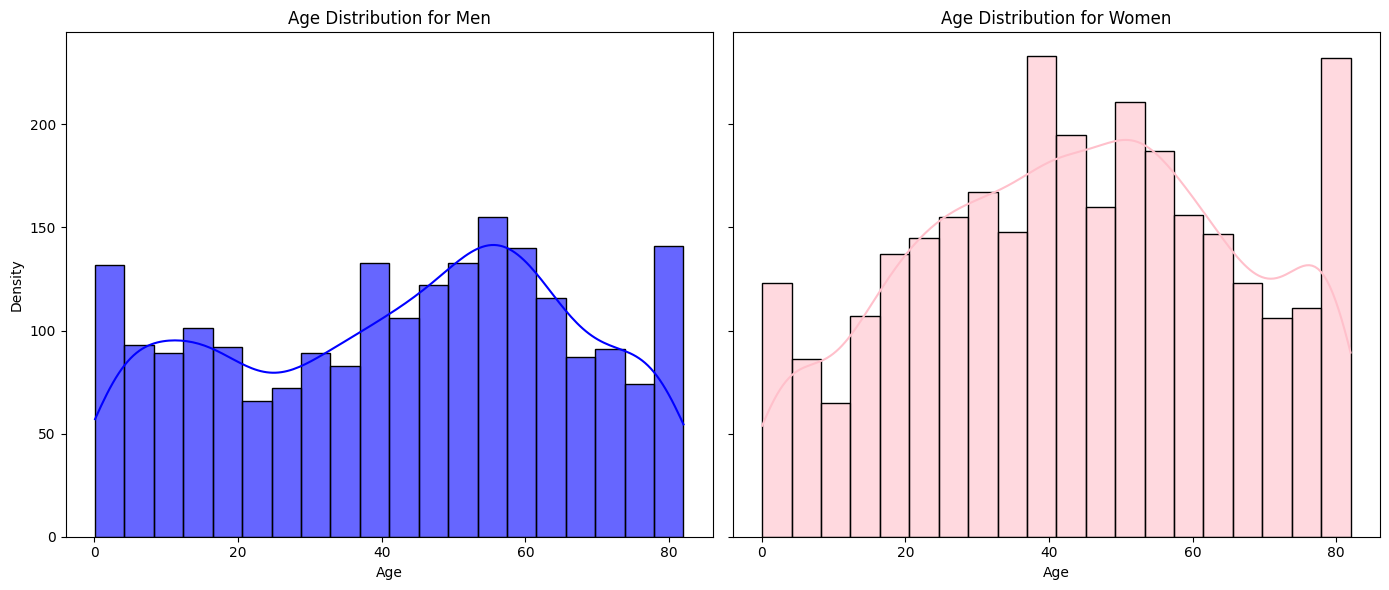

In [7]:
## EDA 

## Seperate data for men and women

data_men = data[data["gender"] == "Male"]
data_female = data[data["gender"] == "Female"]


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data_men['age'], kde=True, color='blue', bins=20, stat='count', ax=axes[0], alpha=0.6)
axes[0].set_title('Age Distribution for Men')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

sns.histplot(data_female['age'], kde=True, color='pink', bins=20, stat='count', ax=axes[1], alpha=0.6)
axes[1].set_title('Age Distribution for Women')
axes[1].set_xlabel('Age')

plt.tight_layout()

plt.show()

From the above plots we can see that there is a higher count of females in this dataset with large proportion of females in the age range of 80. Wheras in the male age distribution graph there is a more even spread

/var/folders/wx/q1jmzm0j1xz16s45y4d2kz2m0000gn/T/ipykernel_22241/3197290833.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")


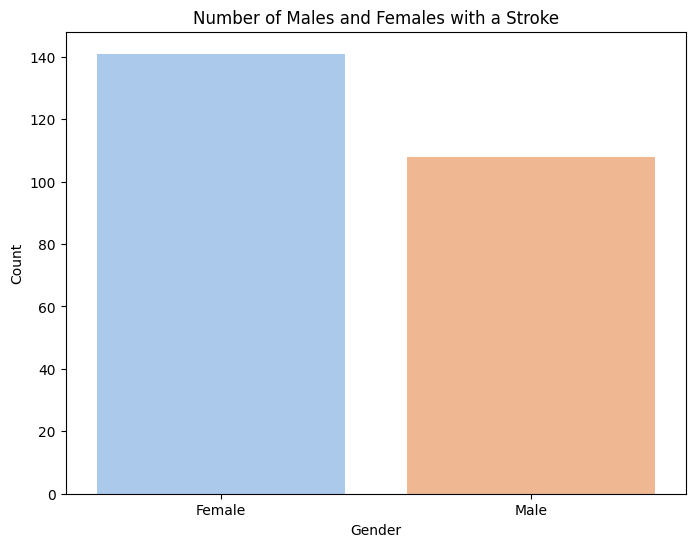

In [8]:
stroke_data = data[data['stroke'] == 1]

# Count the number of males and females with a stroke
gender_counts = stroke_data['gender'].value_counts()

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")

# Add titles and labels
plt.title("Number of Males and Females with a Stroke")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show plot
plt.show()


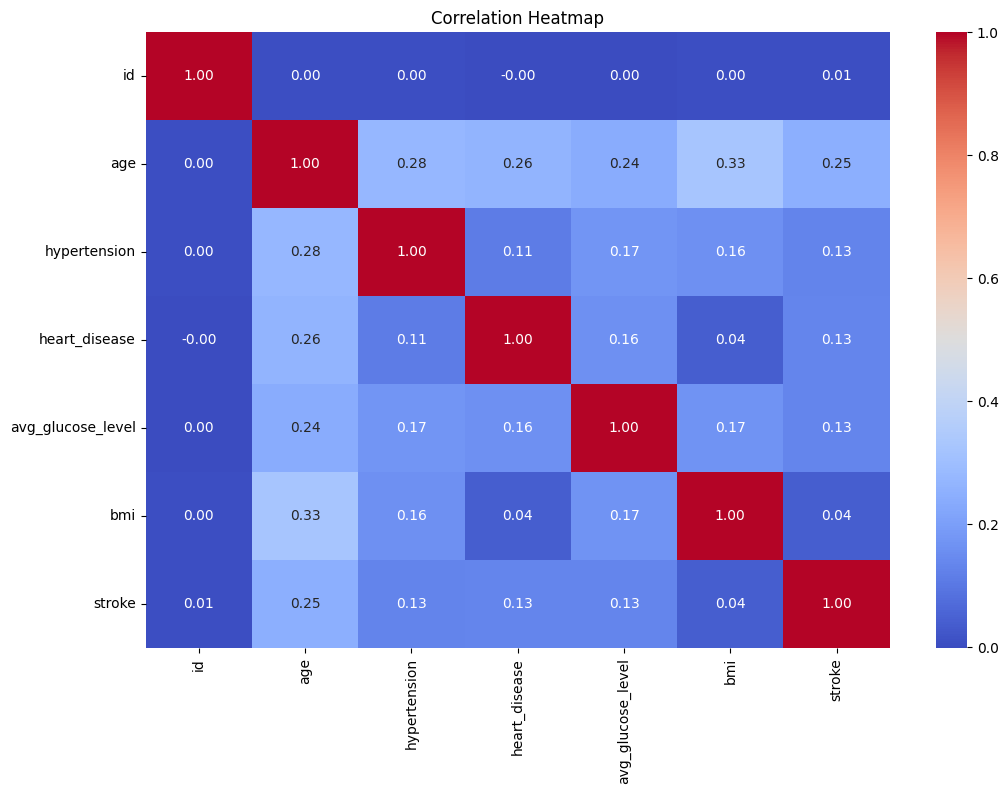

In [9]:
## Correlation Plot 
numeric_data = data.select_dtypes(include=['number'])


corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='gender', ylabel='count'>

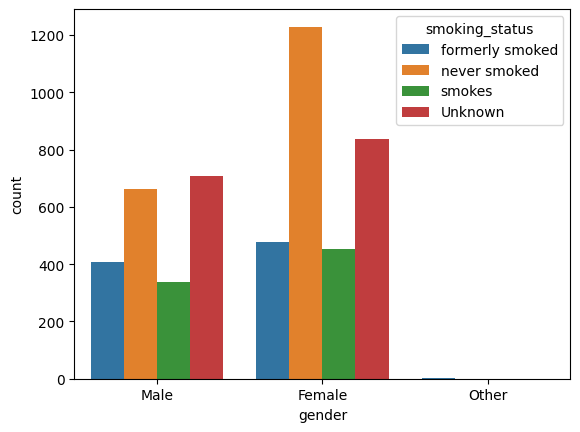

In [10]:
sns.countplot(data=data,x='gender',hue='smoking_status')


From this we can see that most females are unlikely to smoke 

<Axes: xlabel='heart_disease', ylabel='count'>

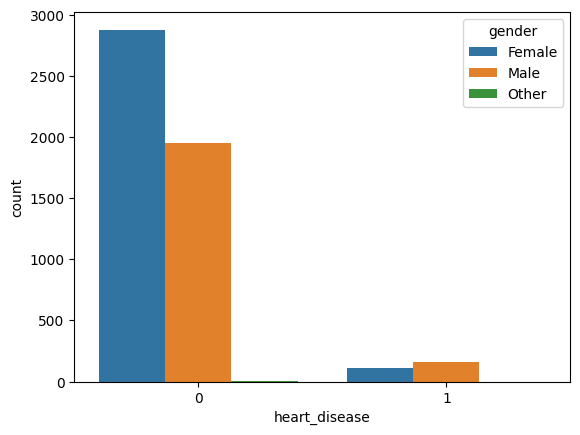

In [11]:
sns.countplot(data=data,x='heart_disease',hue='gender')


Less heart diesease for women 

<Axes: xlabel='hypertension', ylabel='count'>

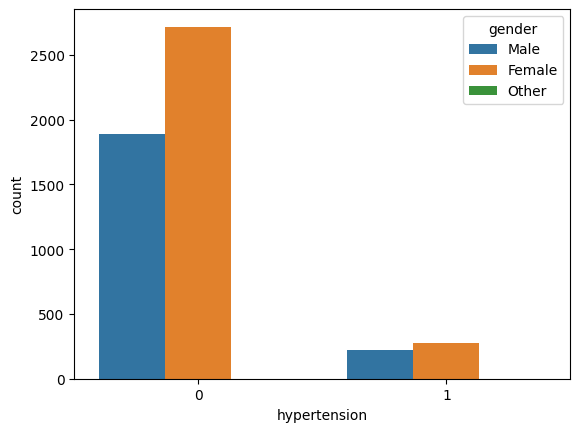

In [12]:
sns.countplot(data=data,x='hypertension',hue='gender')


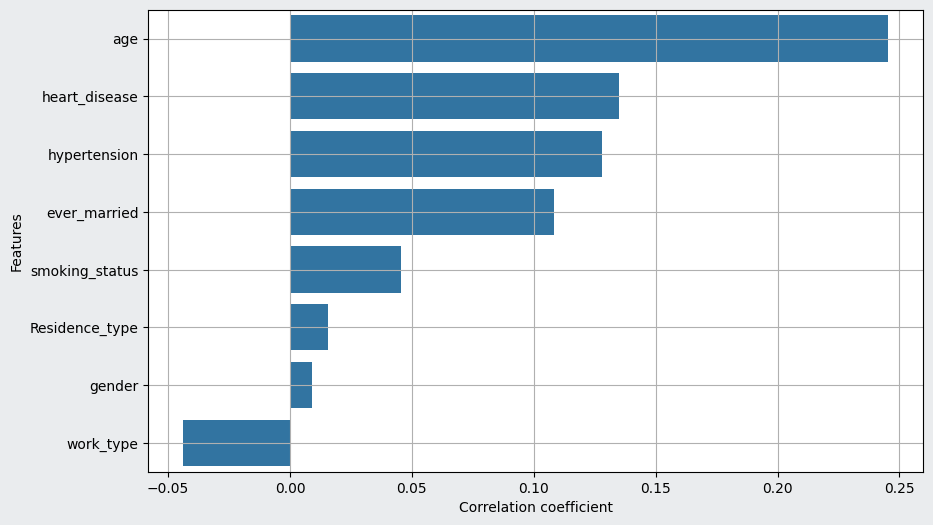

In [40]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
correlation_table = []
for cols in features:
    y = data["stroke"]
    x = data[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False))
ax.grid()

From this we can see that age is the most important feature as it is highly correlated

### Machine Learning model

In [13]:
## One hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
categorical_cols = [col for col in data.columns if data[col].dtype == 'object'] ## Gather categorical columns
le = LabelEncoder()
le.fit(data[categorical_cols].values.ravel()) 

def encode_label(col):
      return le.transform(col)
data[categorical_cols] =  data[categorical_cols].apply(encode_label) ## Apply it to testing set
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,2,67.0,0,1,11,6,10,228.69,36.600000,13,1
1,51676,0,61.0,0,0,11,8,7,202.21,28.893237,14,1
2,31112,2,80.0,0,1,11,6,7,105.92,32.500000,14,1
3,60182,0,49.0,0,0,11,6,10,171.23,34.400000,15,1
4,1665,0,79.0,1,0,11,8,7,174.12,24.000000,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,11,6,10,83.75,28.893237,14,0
5106,44873,0,81.0,0,0,11,8,10,125.20,40.000000,14,0
5107,19723,0,35.0,0,0,11,8,7,82.99,30.600000,14,0
5108,37544,2,51.0,0,0,11,6,7,166.29,25.600000,13,0


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV

X = data.drop(['stroke'], axis=1).values 
y = data['stroke'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score

# Function to generate a colored confusion matrix
def plot_confusion_matrix(model, X_test, y_test, class_labels):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Function to plot a histogram of model names and their accuracy scores
def plot_model_accuracies(model_names, accuracies):
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, accuracies, color='skyblue')
    plt.xlabel('Model Names')
    plt.ylabel('Accuracy Scores')
    plt.title('Model Accuracy Comparison')
    plt.xticks(rotation=45, ha='right')
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
    plt.tight_layout()
    plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression - Train Score: 0.950796757058988, Test Score: 0.9504240052185258


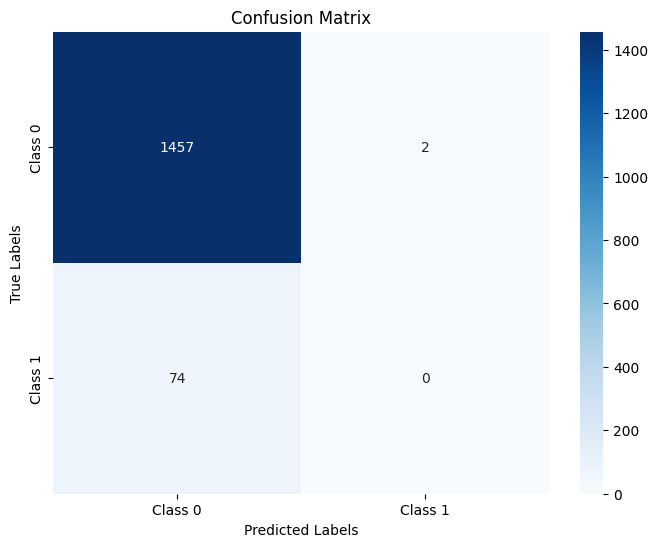

DecisionTreeClassifier - Train Score: 1.0, Test Score: 0.9099804305283757


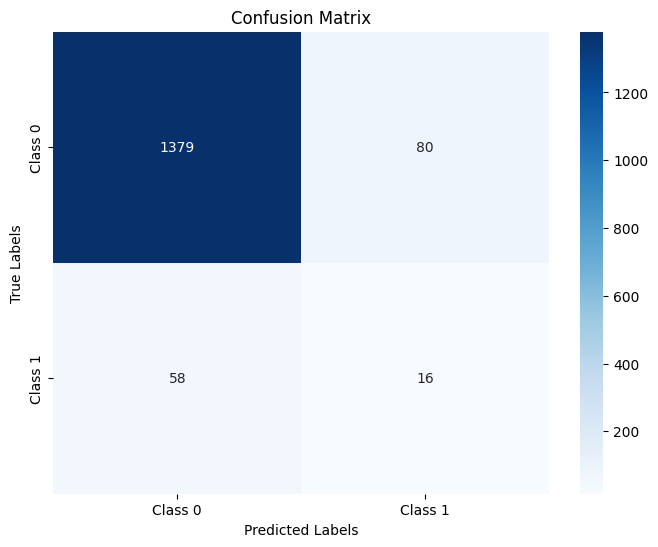

RandomForestClassifier - Train Score: 1.0, Test Score: 0.9504240052185258


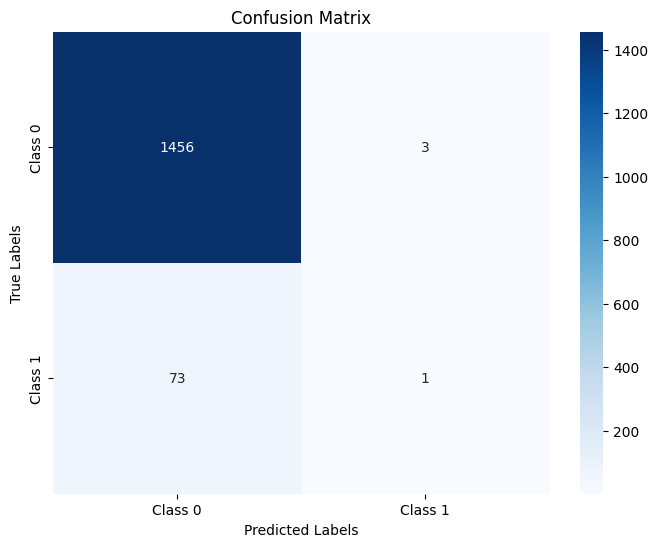

MLPClassifier - Train Score: 0.9510763209393346, Test Score: 0.9517286366601435


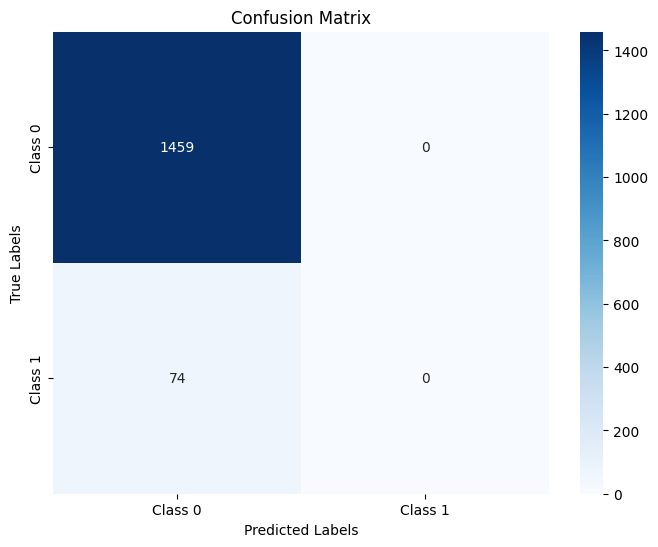

SVC - Train Score: 0.9510763209393346, Test Score: 0.9517286366601435


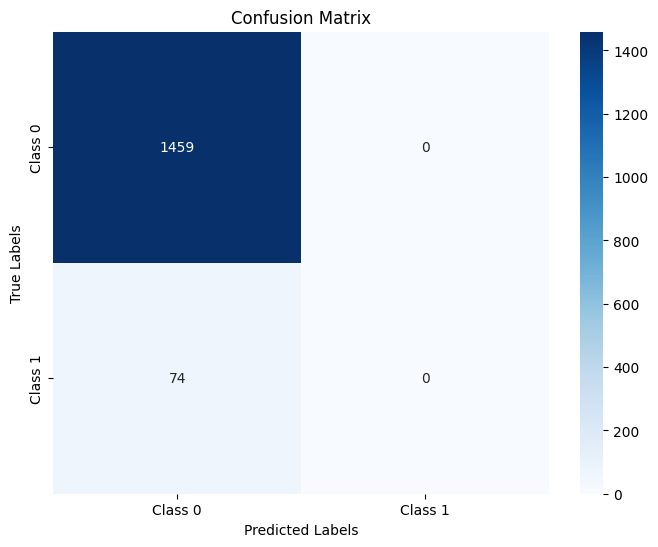

GradientBoostingClassifier - Train Score: 0.9600223651104277, Test Score: 0.9465101108936725


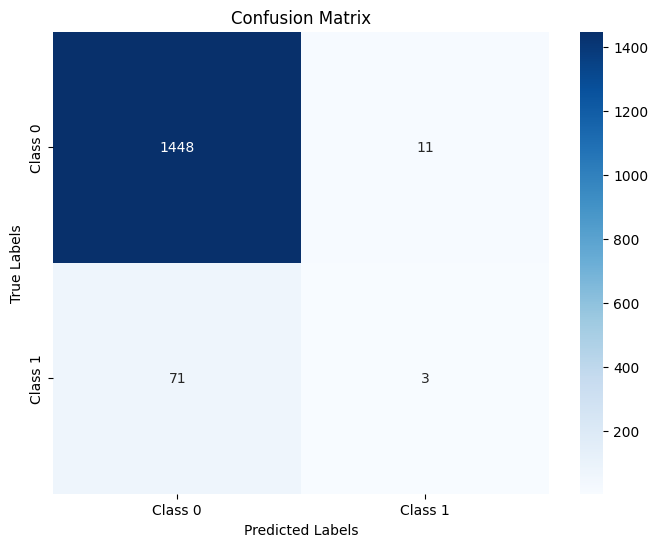

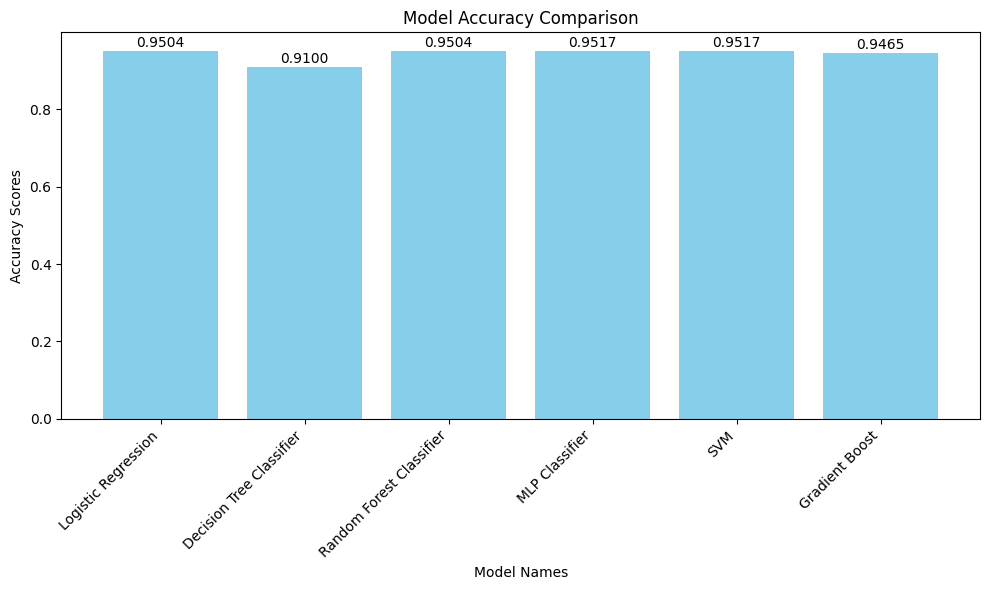

In [46]:

# Example Usage
# Assuming you have train-test split data: X_train, X_test, y_train, y_test
# and you have a list of models and their names:
#
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# models = [RandomForestClassifier(), SVC()]
# model_names = ["Random Forest", "SVC"]
# accuracies = []
#
# for model in models:
#     train_score, test_score = evaluate_model(model, X_train, y_train, X_test, y_test)
#     accuracies.append(test_score)
#     print(f"{model.__class__.__name__} - Train Score: {train_score}, Test Score: {test_score}")
#     plot_confusion_matrix(model, X_test, y_test, class_labels=["Class 0", "Class 1"])
#
# plot_model_accuracies(model_names, accuracies)

models= [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), MLPClassifier(), SVC(), GradientBoostingClassifier()]
model_names = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "MLP Classifier", "SVM", "Gradient Boost"]
accuracies = []

for model in models:
     train_score, test_score = evaluate_model(model, X_train, y_train, X_test, y_test)
     accuracies.append(test_score)
     print(f"{model.__class__.__name__} - Train Score: {train_score}, Test Score: {test_score}")
     plot_confusion_matrix(model, X_test, y_test, class_labels=["Class 0", "Class 1"])
plot_model_accuracies(model_names, accuracies)




Training Score 0.9600223651104277
Testing Score  0.9465101108936725
0.9465101108936725


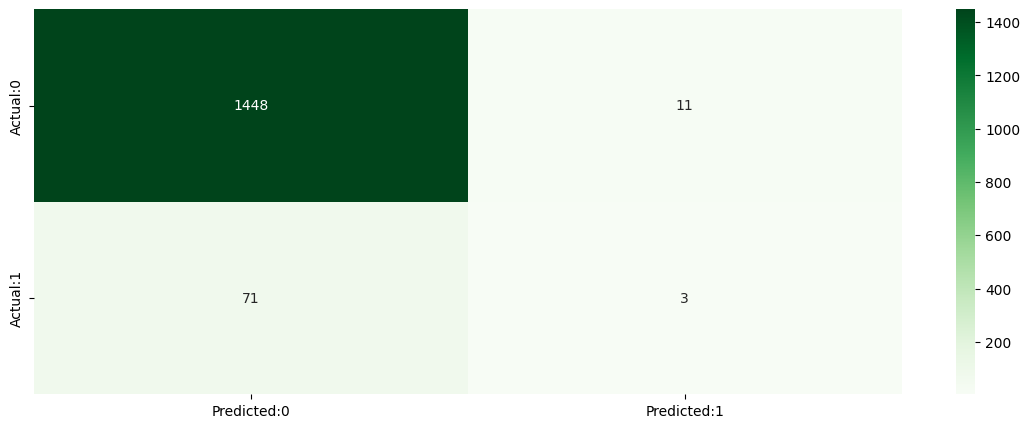

In [47]:
xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(X_train, y_train)

xgboost_score = xgboost.score(X_train, y_train)
xgboost_test = xgboost.score(X_test, y_test)

y_pred = xgboost.predict(X_test)
 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',xgboost_score)
print('Testing Score ',xgboost_test)


plt.figure(figsize=(14,5))

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens");
print(accuracy_score(y_test,y_pred))

In [19]:
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),           # Number of trees in the forest
    'max_depth': [None] + list(range(10, 51, 10)), # Maximum depth of trees
    'min_samples_split': randint(2, 20),         # Minimum samples to split an internal node
    'min_samples_leaf': randint(1, 20),          # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features considered for best split
    'bootstrap': [True, False]                   # Whether bootstrap samples are used
}

# Initialize RandomForestClassifier
forest = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist, 
                                   n_iter=100, scoring='accuracy', cv=5, 
                                   verbose=2, random_state=42, n_jobs=-1)

# Fit the model to find the best hyperparameters
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Use the best estimator for predictions
best_forest = random_search.best_estimator_
best_forest.fit(X_train, y_train)

# Evaluate the best model
forest_score = best_forest.score(X_train, y_train)
forest_test = best_forest.score(X_test, y_test)

y_pred = best_forest.predict(X_test)

# Evaluation
cm = confusion_matrix(y_test, y_pred)
print('Training Score:', forest_score)
print('Testing Score:', forest_test)
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', classification_report(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=19, min_samples_split=12, n_estimators=187; total time=   0.9s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=19, min_samples_split=12, n_estima

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
165 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
79 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10

Best parameters found:  {'bootstrap': True, 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 19, 'min_samples_split': 12, 'n_estimators': 187}
Best cross-validation score:  0.9524741180607101
Training Score: 0.9524741403410679
Testing Score: 0.9484670580560991
Confusion Matrix:
 [[1454    0]
 [  79    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1454
           1       0.00      0.00      0.00        79

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [35]:
mlp=MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=21)
mlp.fit(X_train, y_train)
mlp_pred= mlp.predict(X_test)

mlp_score = mlp.score(X_train, y_train)
mlp_test = mlp.score(X_test, y_test)


y_pred =mlp.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',mlp_score)
print('Testing Score ',mlp_test)
print(cm)

Iteration 1, loss = 5.25044728
Iteration 2, loss = 1.71302130
Iteration 3, loss = 3.37707633
Iteration 4, loss = 3.46189629
Iteration 5, loss = 3.27268428
Iteration 6, loss = 3.30095821
Iteration 7, loss = 3.36593200
Iteration 8, loss = 3.23922158
Iteration 9, loss = 2.11912287
Iteration 10, loss = 3.10212606
Iteration 11, loss = 1.68804832
Iteration 12, loss = 2.89562825
Iteration 13, loss = 3.33867170
Iteration 14, loss = 2.99551182
Iteration 15, loss = 3.26749011
Iteration 16, loss = 2.80061016
Iteration 17, loss = 1.86667362
Iteration 18, loss = 2.90550909
Iteration 19, loss = 2.53424533
Iteration 20, loss = 1.53390057
Iteration 21, loss = 2.10482751
Iteration 22, loss = 1.74928575
Iteration 23, loss = 2.03668637
Iteration 24, loss = 2.03524689
Iteration 25, loss = 1.40484013
Iteration 26, loss = 1.11572885
Iteration 27, loss = 1.76267234
Iteration 28, loss = 1.46203177
Iteration 29, loss = 1.49211405
Iteration 30, loss = 2.47961143
Iteration 31, loss = 2.87996878
Iteration 32, los

In [21]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [22]:
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Additional hidden layers
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

# Output layer with sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1).history

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9495 - loss: 0.1998 - val_accuracy: 0.9485 - val_loss: 0.2054
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.9505 - loss: 0.1971 - val_accuracy: 0.9485 - val_loss: 0.2056
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.9531 - loss: 0.1896 - val_accuracy: 0.9485 - val_loss: 0.2056
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9559 - loss: 0.1815 - val_accuracy: 0.9485 - val_loss: 0.2058
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.9488 - loss: 0.2017 - val_accuracy: 0.9485 - val_loss: 0.2060
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9515 - loss: 0.1939 - val_accuracy: 0.9485 - val_loss: 0.2062
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.9538 - loss: 0.1873 - val_accuracy: 0.9485 - val_loss: 0.2053
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.9486 - loss: 0.2025 - va

In [34]:
history

{'accuracy': [0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527,
  0.9524741172790527

In [30]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
Accuracy: 0.9484670580560991
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1454
           1       0.00      0.00      0.00        79

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  